In [2]:
library('corrplot')
library('tidyverse')
library('ggcorrplot')
library('ggplot2')
library('plyr') # to use count function
library('caret')
library('caTools')

Warning message:
"package 'ggcorrplot' was built under R version 3.6.3"Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from 'package:purrr':

    compact

Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"
Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift

Warning message:
"package 'ca

In [3]:
# Importing the data file
data <- read_csv('heart.csv')


-- Column specification --------------------------------------------------------
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  target = col_double()
)



In [4]:
# DISPLAY THE FIRST FEW ROWS OF DATA
head(data)


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [5]:
# DISPLAY THE NUMBER OF ROWS AND COLUMNS
nrow(data)
ncol(data)

[1] 303

[1] 14

In [6]:
# Understanding the datatype of dataset
str(data)

spec_tbl_df[,14] [303 x 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ age     : num [1:303] 63 37 41 56 57 57 56 44 52 57 ...
 $ sex     : num [1:303] 1 1 0 1 0 1 0 1 1 1 ...
 $ cp      : num [1:303] 3 2 1 1 0 0 1 1 2 2 ...
 $ trestbps: num [1:303] 145 130 130 120 120 140 140 120 172 150 ...
 $ chol    : num [1:303] 233 250 204 236 354 192 294 263 199 168 ...
 $ fbs     : num [1:303] 1 0 0 0 0 0 0 0 1 0 ...
 $ restecg : num [1:303] 0 1 0 1 1 1 0 1 1 1 ...
 $ thalach : num [1:303] 150 187 172 178 163 148 153 173 162 174 ...
 $ exang   : num [1:303] 0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak : num [1:303] 2.3 3.5 1.4 0.8 0.6 0.4 1.3 0 0.5 1.6 ...
 $ slope   : num [1:303] 0 0 2 2 2 1 1 2 2 2 ...
 $ ca      : num [1:303] 0 0 0 0 0 0 0 0 0 0 ...
 $ thal    : num [1:303] 1 2 2 2 2 1 2 3 3 2 ...
 $ target  : num [1:303] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   age = col_double(),
  ..   sex = col_double(),
  ..   cp = col_double(),
  ..   trestbps = col_double(),
  ..   chol = c

In [7]:
# DISPLAY THE SUMMARY
summary(data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [8]:
# Displaying the coralation matrix
corr <- cor(data)

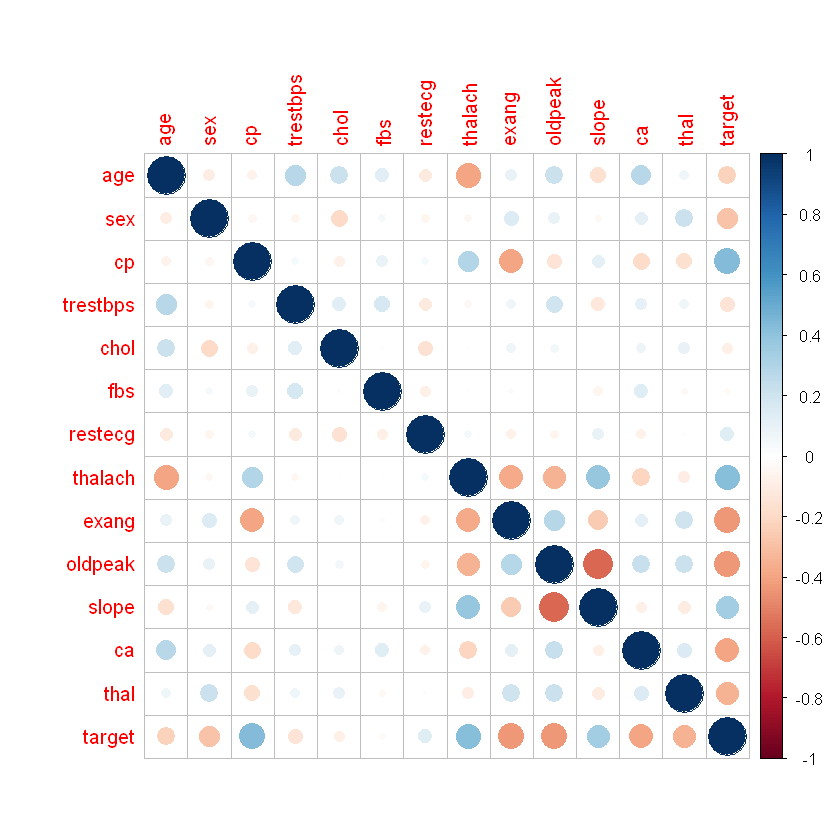

In [9]:
# Visualize the correlation matrix
corrplot(corr)

In [10]:
## Data wrangling and counting missing values

In [11]:
# Deleting not related variables
data = subset(data, select = c(-fbs,-chol,-restecg))

In [12]:
# Coverting the categorical data to factor
data$s <- as.factor(data$sex)
data$target <- as.factor(data$target)
data$cp <- as.factor(data$cp)
data$ca <- as.factor(data$ca)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$thal <- as.factor(data$thal)

In [13]:

# Summary after pre-processing the data
summary(data)

      age             sex         cp         trestbps        thalach     
 Min.   :29.00   Min.   :0.0000   0:143   Min.   : 94.0   Min.   : 71.0  
 1st Qu.:47.50   1st Qu.:0.0000   1: 50   1st Qu.:120.0   1st Qu.:133.5  
 Median :55.00   Median :1.0000   2: 87   Median :130.0   Median :153.0  
 Mean   :54.37   Mean   :0.6832   3: 23   Mean   :131.6   Mean   :149.6  
 3rd Qu.:61.00   3rd Qu.:1.0000           3rd Qu.:140.0   3rd Qu.:166.0  
 Max.   :77.00   Max.   :1.0000           Max.   :200.0   Max.   :202.0  
 exang      oldpeak     slope   ca      thal    target  s      
 0:204   Min.   :0.00   0: 21   0:175   0:  2   0:138   0: 96  
 1: 99   1st Qu.:0.00   1:140   1: 65   1: 18   1:165   1:207  
         Median :0.80   2:142   2: 38   2:166                  
         Mean   :1.04           3: 20   3:117                  
         3rd Qu.:1.60           4:  5                          
         Max.   :6.20                                          

In [14]:
# DISPLAY THE NUMBER OF NAs IN EACH COLUMN
colSums(is.na(data))

age      sex       cp trestbps  thalach    exang  oldpeak    slope 
       0        0        0        0        0        0        0        0 
      ca     thal   target        s 
       0        0        0        0

In [15]:
## Target variable Analysis

Warning message:
"Use of `data$target` is discouraged. Use `target` instead."Warning message:
"Use of `data$target` is discouraged. Use `target` instead."

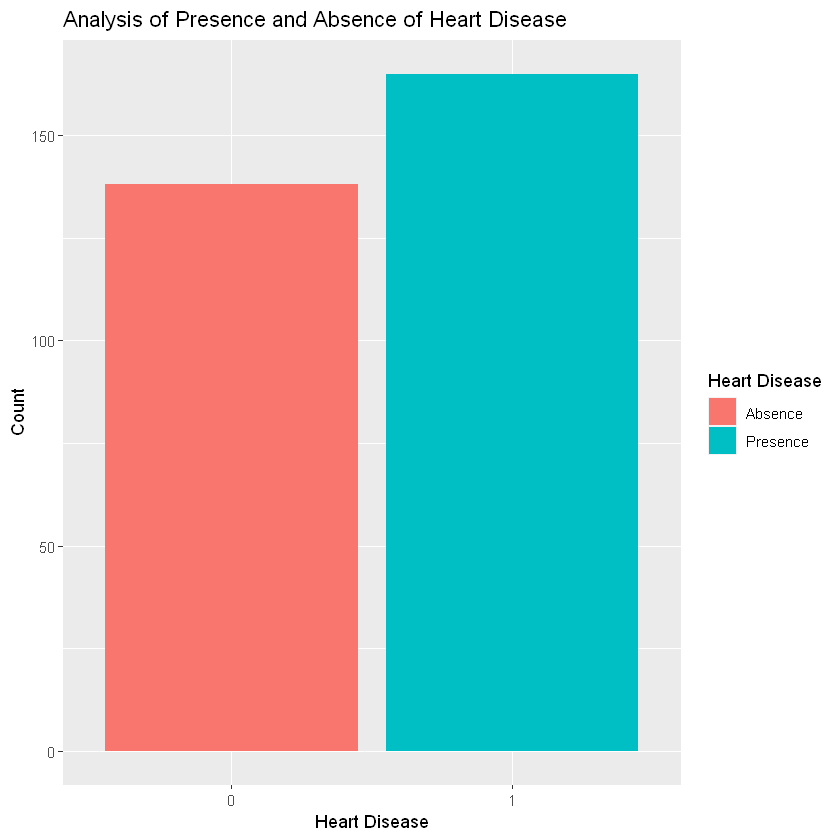

In [19]:
# Bar plot for target (Heart disease) 
data$target <- as.factor(data$target)
ggplot(data, aes(x=data$target, fill=data$target)) + 
  geom_bar() +
  xlab("Heart Disease") +
  ylab("Count") +
  ggtitle("Analysis of Presence and Absence of Heart Disease") +
  scale_fill_discrete(name = "Heart Disease", labels = c("Absence", "Presence"))

Warning message:
"Use of `ageCount$age` is discouraged. Use `age` instead."Warning message:
"Use of `ageCount$freq` is discouraged. Use `freq` instead."

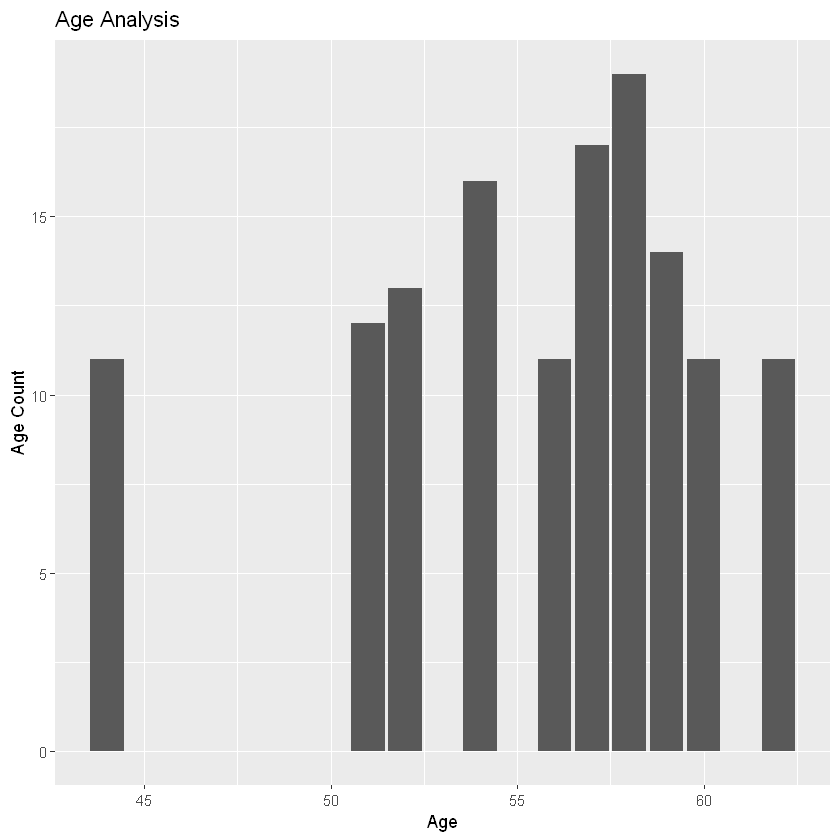

In [17]:
## Age variable Analysis


# Counting the frequency of the values of the age
ageCount <- count(data, 'age')
ageCount <- subset(ageCount[which(ageCount$freq > 10), ])

#ploting the age with frquency greater than 10
ggplot(ageCount, aes(x=ageCount$age, y=ageCount$freq)) + 
  ggtitle("Age Analysis") +
  xlab("Age")  +
  ylab("Age Count") +
  geom_bar(stat="identity")


Warning message:
"Use of `ageCount$age` is discouraged. Use `age` instead."Warning message:
"Use of `ageCount$freq` is discouraged. Use `freq` instead."

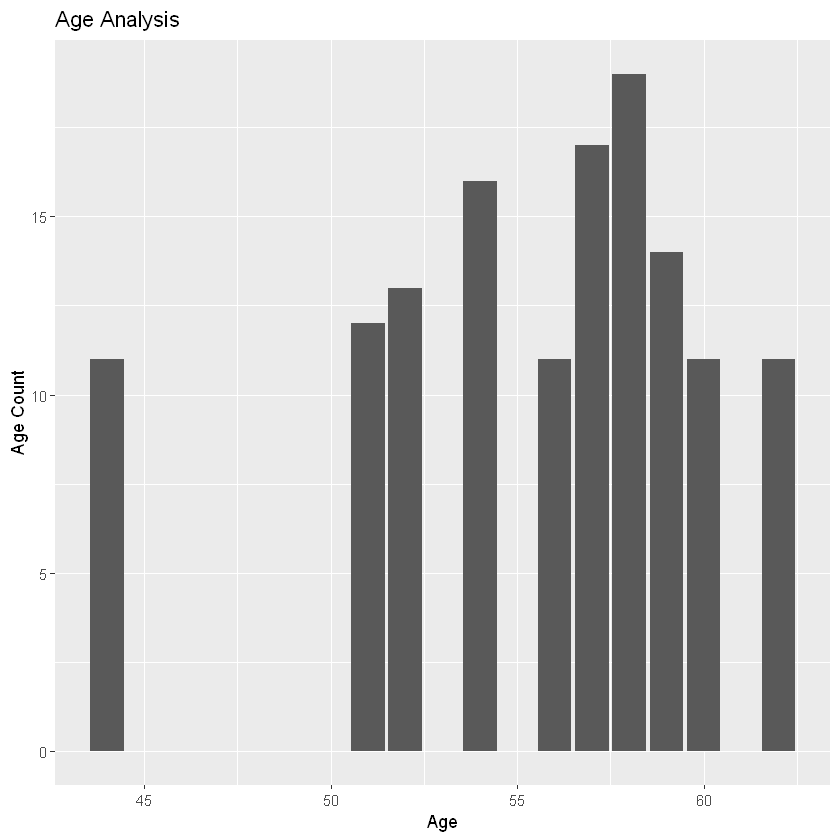

In [20]:
## Age variable Analysis


# Counting the frequency of the values of the age
ageCount <- count(data, 'age')
ageCount <- subset(ageCount[which(ageCount$freq > 10), ])

#ploting the age with frquency greater than 10
ggplot(ageCount, aes(x=ageCount$age, y=ageCount$freq)) + 
  ggtitle("Age Analysis") +
  xlab("Age")  +
  ylab("Age Count") +
  geom_bar(stat="identity")


In [21]:
# Group the different ages in three groups (young, middle, old)
young <- data[which((data$age<45)), ]
middle <- data[which((data$age>=45)&(data$age<55)), ]
elderly <- data[which(data$age>55), ]
groups <- data.frame(age_group = c("young","middle","elderly"), group_count = c(NROW(young$age), NROW(middle$age), NROW(elderly$age)))


Warning message:
"Use of `groups$age_group` is discouraged. Use `age_group` instead."Warning message:
"Use of `groups$group_count` is discouraged. Use `group_count` instead."Warning message:
"Use of `groups$age_group` is discouraged. Use `age_group` instead."

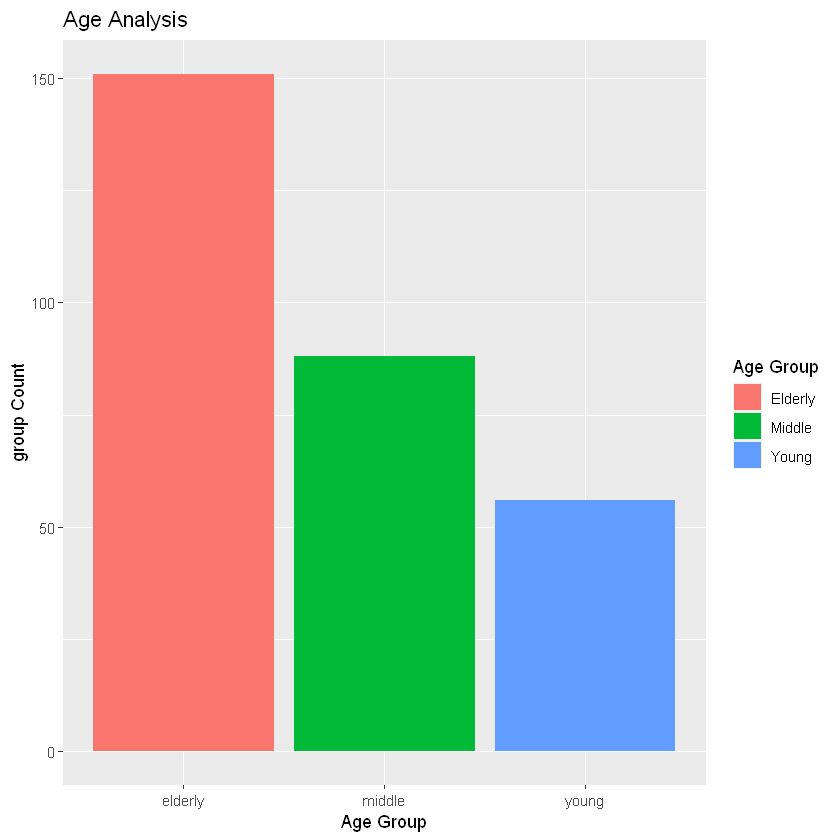

In [22]:
#ploting different age groups
ggplot(groups, aes(x=groups$age_group, y=groups$group_count, fill=groups$age_group)) + 
  ggtitle("Age Analysis") +
  xlab("Age Group")  +
  ylab("group Count") +
  geom_bar(stat="identity") +
  scale_fill_discrete(name = "Age Group", labels = c("Elderly", "Middle", "Young"))

In [24]:
# Adding the age groups to the dataset
data <- cbind(data, groups = ifelse((data$age<45), 0, ifelse((data$age>=45)&(data$age<55), 1, 2)))
data$groups <- as.factor(data$groups)

data = subset(data, select = c(-age))


Warning message:
"Use of `data$groups` is discouraged. Use `groups` instead."Warning message:
"Use of `data$sex` is discouraged. Use `sex` instead."Warning message:
"Use of `data$groups` is discouraged. Use `groups` instead."Warning message:
"Use of `data$sex` is discouraged. Use `sex` instead."Warning message:
"Use of `data$groups` is discouraged. Use `groups` instead."Warning message:
"Use of `data$sex` is discouraged. Use `sex` instead."

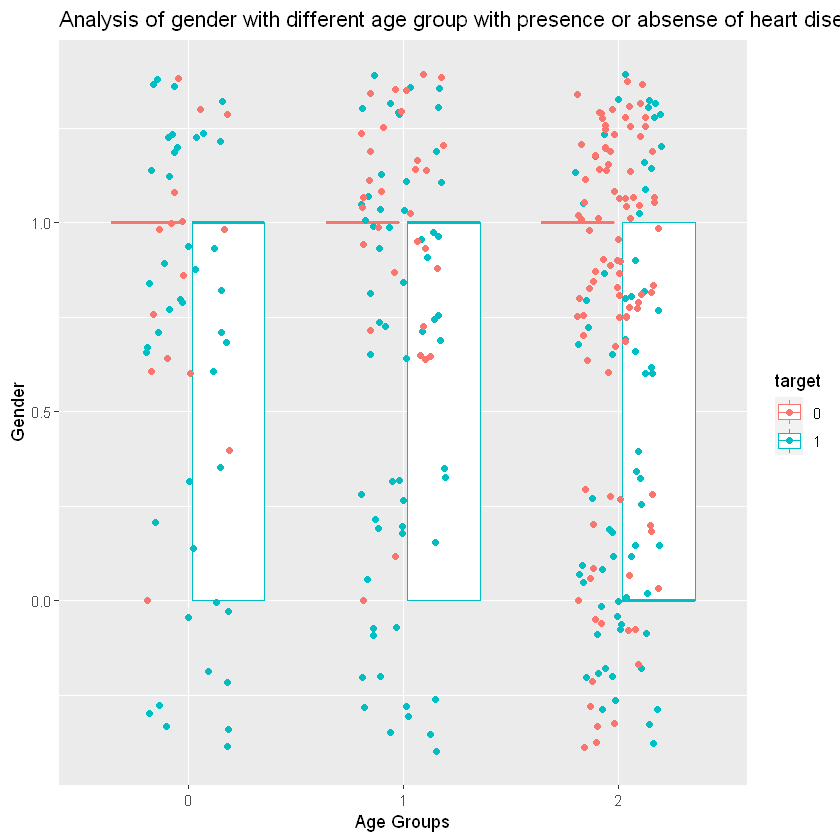

In [25]:
# age_group ~ target ~ sex
ggplot(data, aes(x= factor(data$groups), y=data$sex, colour=target)) + 
  geom_boxplot(stat = "boxplot",
               position = "dodge2") +
  geom_boxplot(outlier.shape = NA) + 
  geom_jitter(width = 0.2) +
  xlab("Age Groups") +
  ylab("Gender") +
  ggtitle("Analysis of gender with different age group with presence or absense of heart disease")

Warning message:
"Use of `data$sex` is discouraged. Use `sex` instead."Warning message:
"Use of `data$target` is discouraged. Use `target` instead."

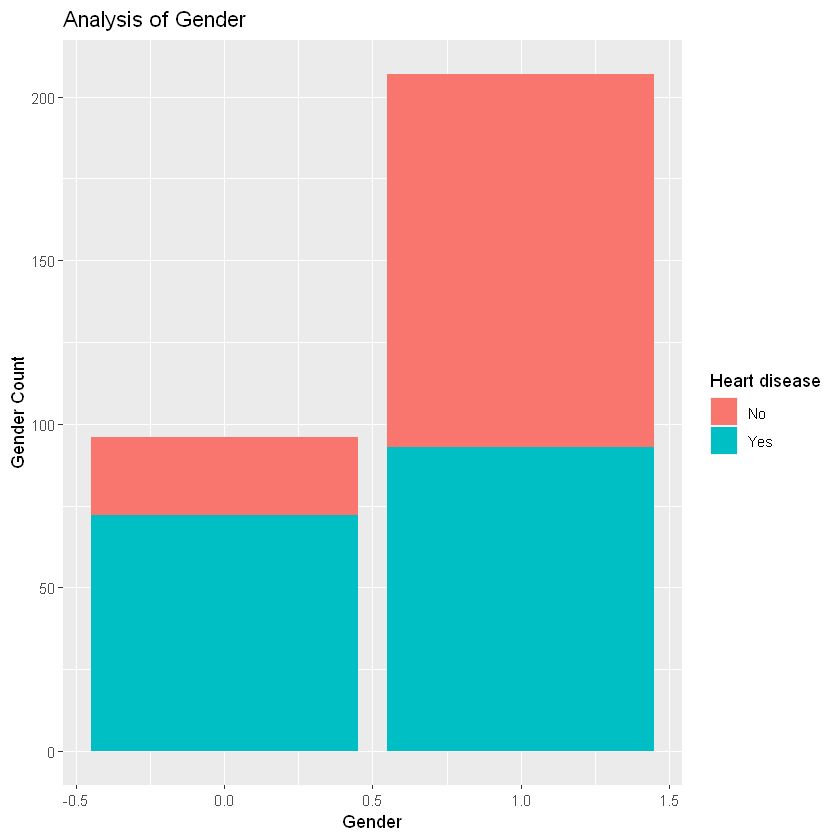

In [27]:
## Sex variable analysis


# Bar plot for sex
ggplot(data, aes(x= data$sex, fill=data$target)) + 
  geom_bar() +
  xlab("Gender") +
  ylab("Gender Count") +
  ggtitle("Analysis of Gender") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))
data = subset(data, select = c(-sex))

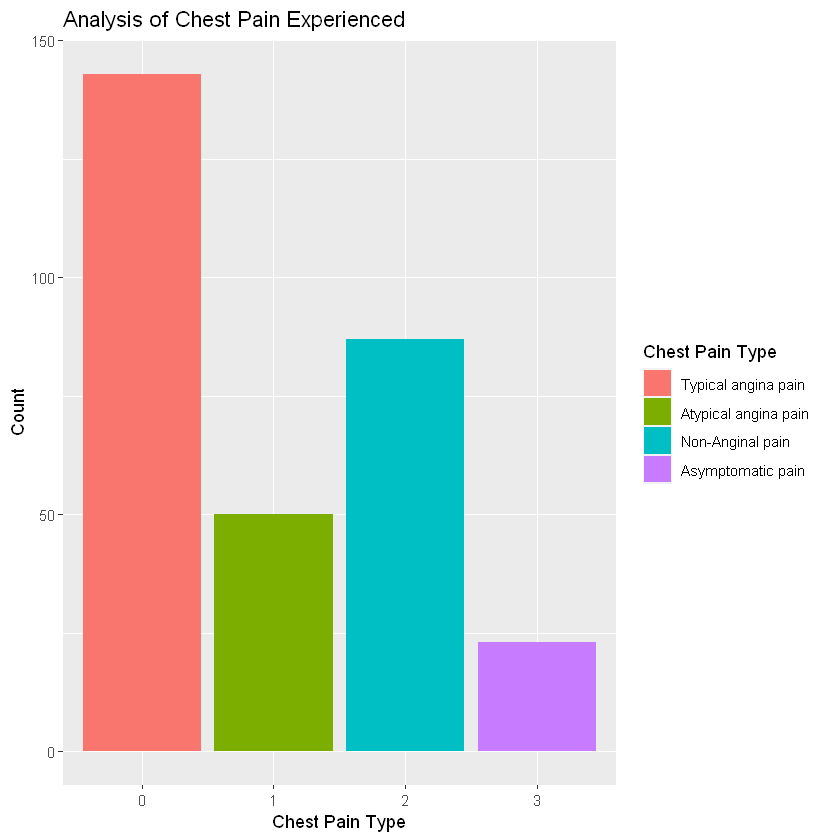

In [28]:
## cp (Chest Pain) variable Analysis


# Bar plot for The chest pain experienced 
ggplot(data, aes(x= cp, fill=cp)) + 
  geom_bar() +
  xlab("Chest Pain Type") +
  ylab("Count") +
  ggtitle("Analysis of Chest Pain Experienced") +
  scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical angina pain", "Atypical angina pain", "Non-Anginal pain", "Asymptomatic pain"))


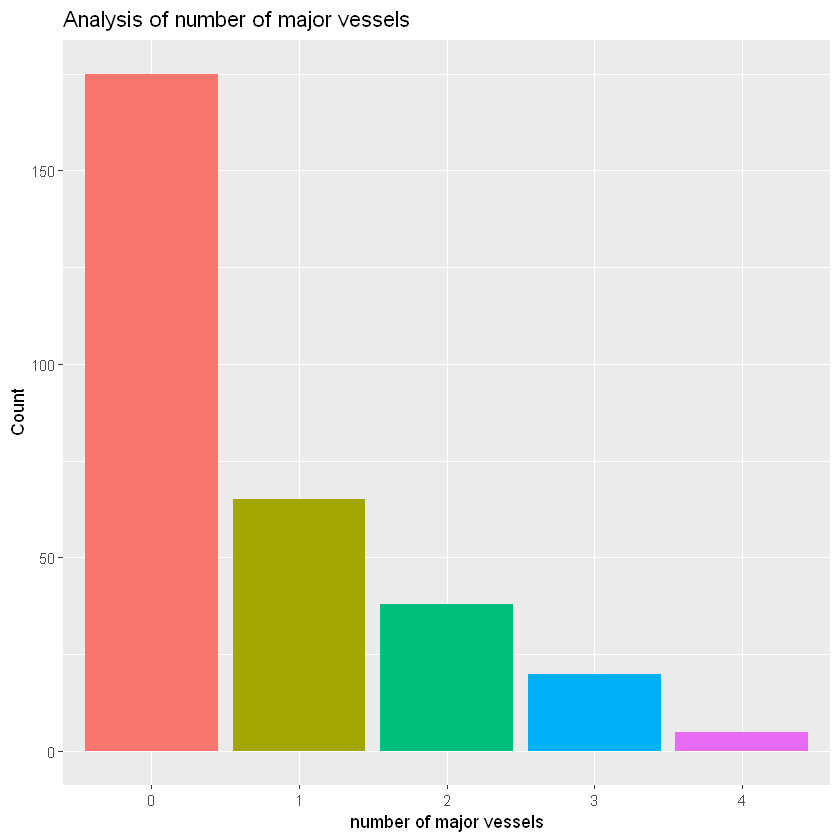

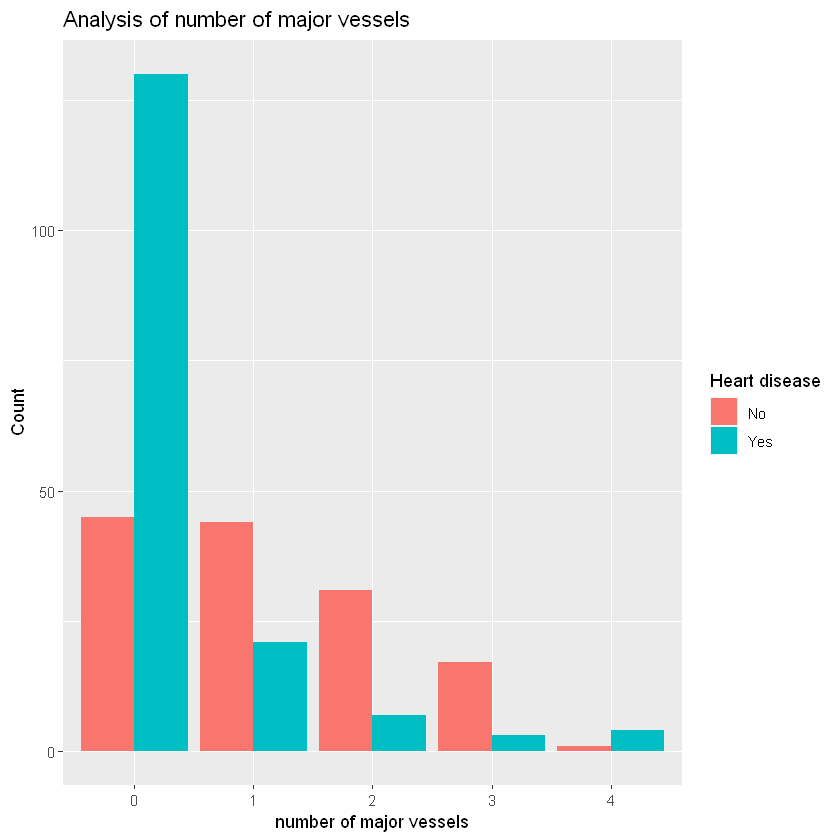

In [29]:

# Bar for ca (number of major vessels (0-3))
ggplot(data, aes(x= ca, fill=ca)) + 
geom_bar() +
  xlab("number of major vessels") +
  ylab("Count") +
  ggtitle("Analysis of number of major vessels") +
  theme(legend.position="none")


ggplot(data, aes(x= ca, fill=target)) + 
  geom_bar(position = 'dodge') +
  xlab("number of major vessels") +
  ylab("Count") +
  ggtitle("Analysis of number of major vessels") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


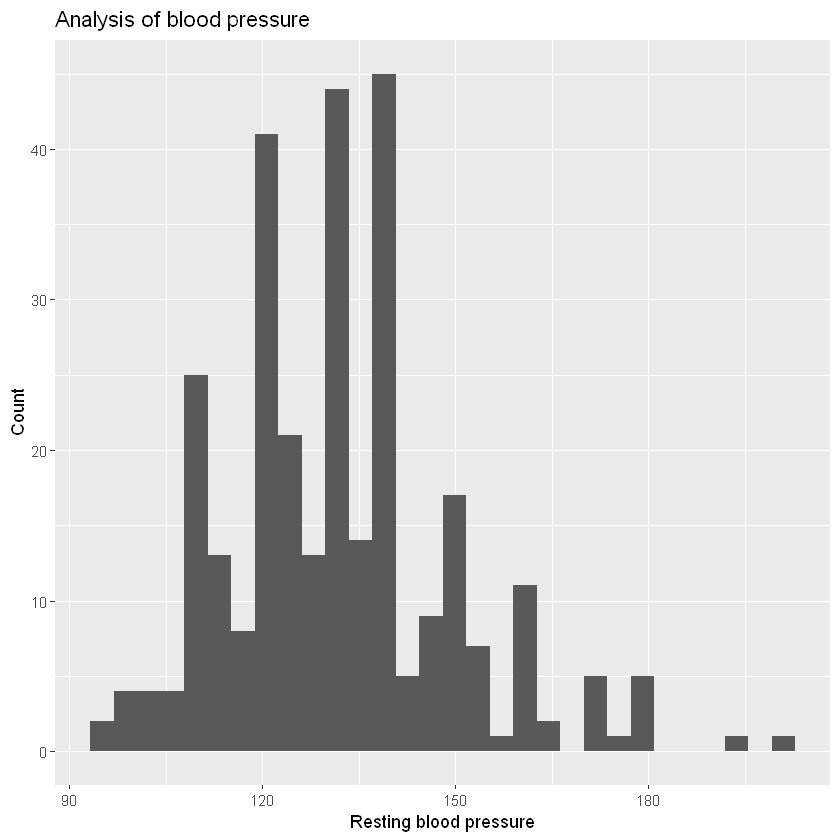

In [30]:
## trestbps (resting blood pressure) variable analysis

# Histogram for trestbps (resting blood pressure)
ggplot(data, aes(x=trestbps)) + 
  geom_histogram() +
  xlab("Resting blood pressure") +
  ylab("Count") +
  ggtitle("Analysis of blood pressure")

In [31]:
# removing the outliers
data$trestbps = ifelse(data$trestbps > 180, NA, data$trestbps)
data$trestbps = ifelse(is.na(data$trestbps), median(data$trestbps[which(!is.na(data$trestbps))]), data$trestbps)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


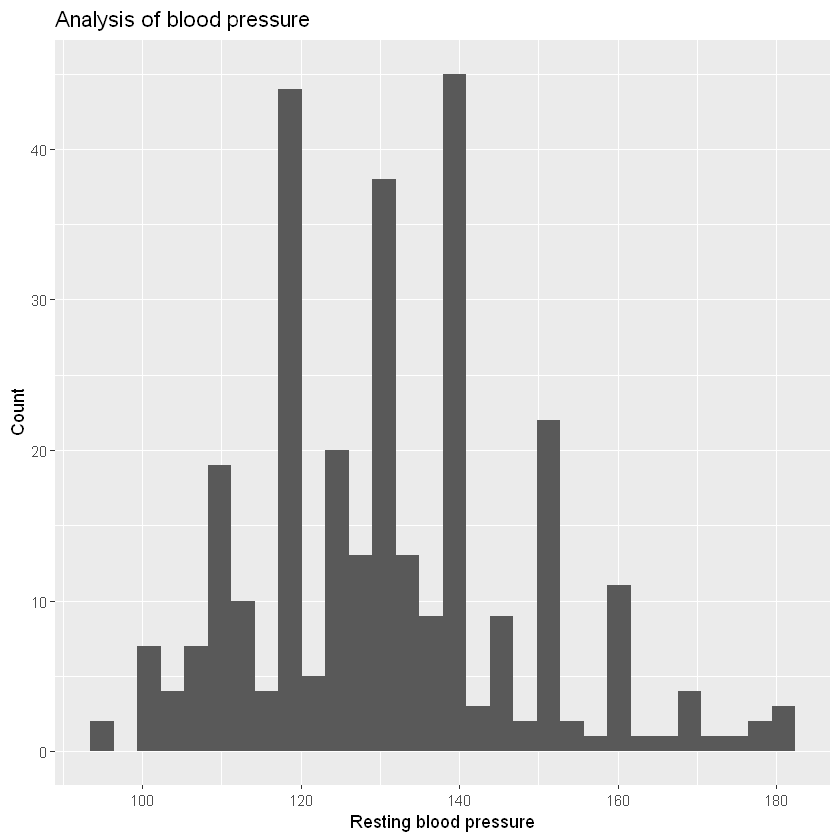

In [32]:
# After the removal of outliers
ggplot(data, aes(x=trestbps)) + 
  geom_histogram() +
  xlab("Resting blood pressure") +
  ylab("Count") +
  ggtitle("Analysis of blood pressure")

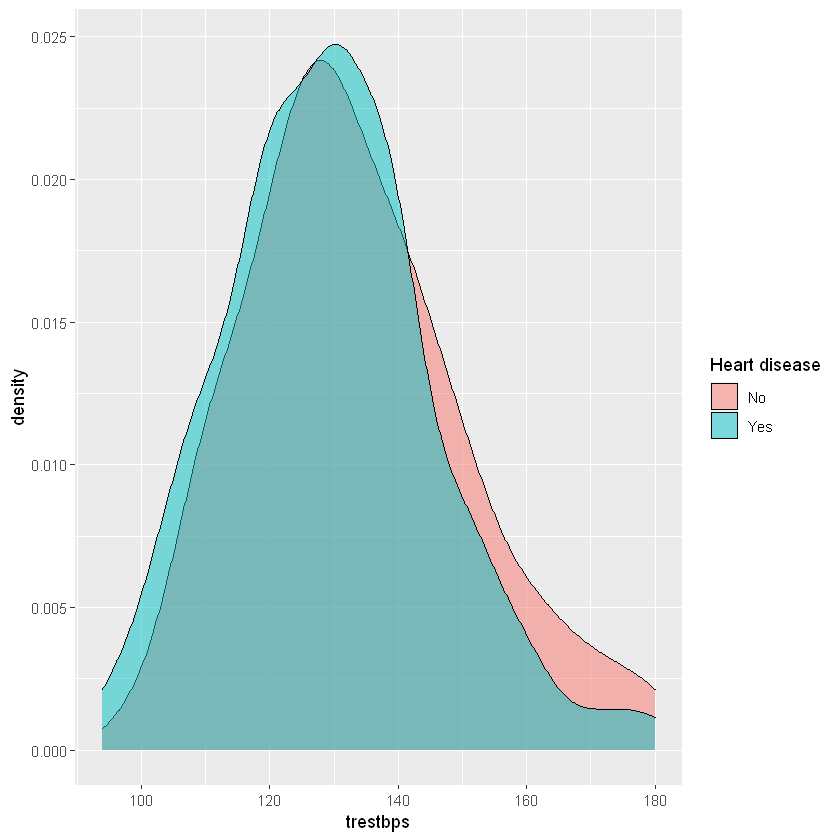

In [33]:

# Density graph for trestbps (resting blood pressure)
ggplot(data, aes(x = trestbps, fill = target)) +
  geom_density(alpha=0.5) +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))




data = subset(data, select = c(-trestbps))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


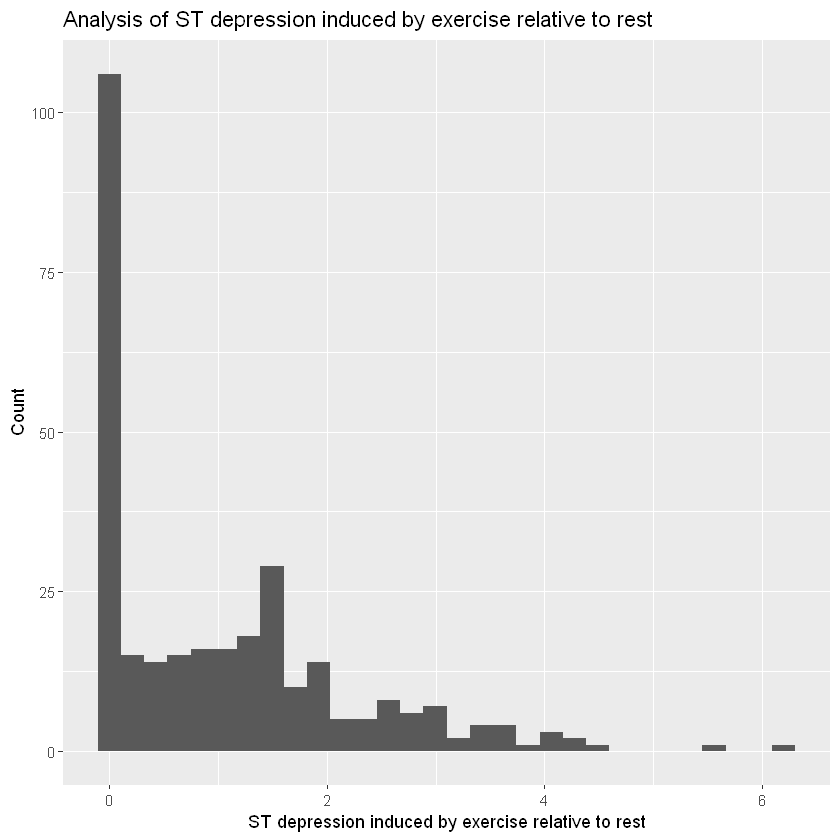

In [34]:
## oldpeak variable analysis


# Histogram for oldpeak (ST depression induced by exercise relative to rest)
ggplot(data, aes(x=oldpeak)) + 
  geom_histogram() +
  xlab("ST depression induced by exercise relative to rest") +
  ylab("Count") +
  ggtitle("Analysis of ST depression induced by exercise relative to rest")


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


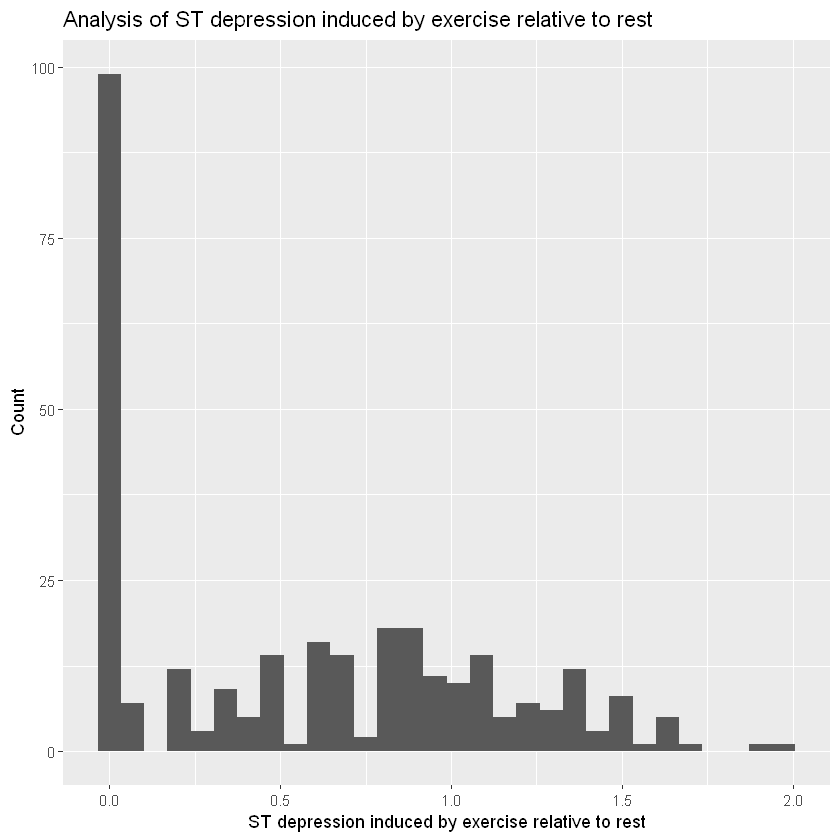

In [35]:
# From the above histogram 
data$oldpeak <- log1p(data$oldpeak)

ggplot(data, aes(x=oldpeak)) + 
  geom_histogram() +
  xlab("ST depression induced by exercise relative to rest") +
  ylab("Count") +
  ggtitle("Analysis of ST depression induced by exercise relative to rest")

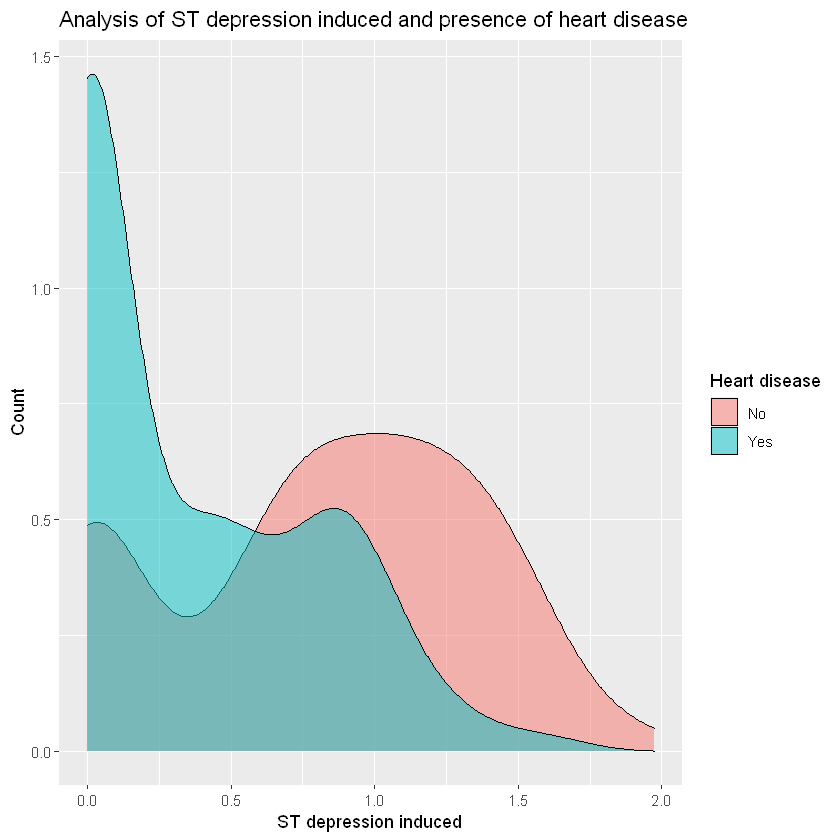

In [36]:
# Density plot for oldpeak ~ target
ggplot(data, aes(x = oldpeak, fill = target)) +
  geom_density(alpha=0.5) +
  xlab("ST depression induced") +
  ylab("Count") +
  ggtitle("Analysis of ST depression induced and presence of heart disease") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))


  [1] 0 0 2 2 2 1 1 2 2 2 2 2 2 1 2 1 2 0 2 2 1 2 2 1 2 2 2 2 2 0 2 2 2 0 2 0 2
 [38] 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 1 2 2 2
 [75] 1 1 1 2 2 1 2 2 2 1 1 1 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 1 1 1 2 2 2
[112] 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 1 1 2 1 2 1 2
[149] 2 2 2 1 1 1 1 1 2 2 1 2 0 2 2 2 2 1 1 0 1 0 1 0 1 2 1 1 2 2 1 1 1 1 2 1 1
[186] 2 2 1 1 2 1 1 1 1 1 0 1 1 1 2 2 1 2 1 0 2 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 0
[223] 1 0 1 0 1 1 1 1 2 1 1 0 1 2 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1
[260] 1 1 2 1 1 1 2 1 2 1 0 2 1 1 2 1 2 1 2 2 1 1 1 1 2 2 1 2 2 1 1 2 0 1 1 0 2
[297] 1 1 1 1 1 1 1
Levels: 0 1 2


Warning message:
"Use of `data$slope` is discouraged. Use `slope` instead."Warning message:
"Use of `data$slope` is discouraged. Use `slope` instead."

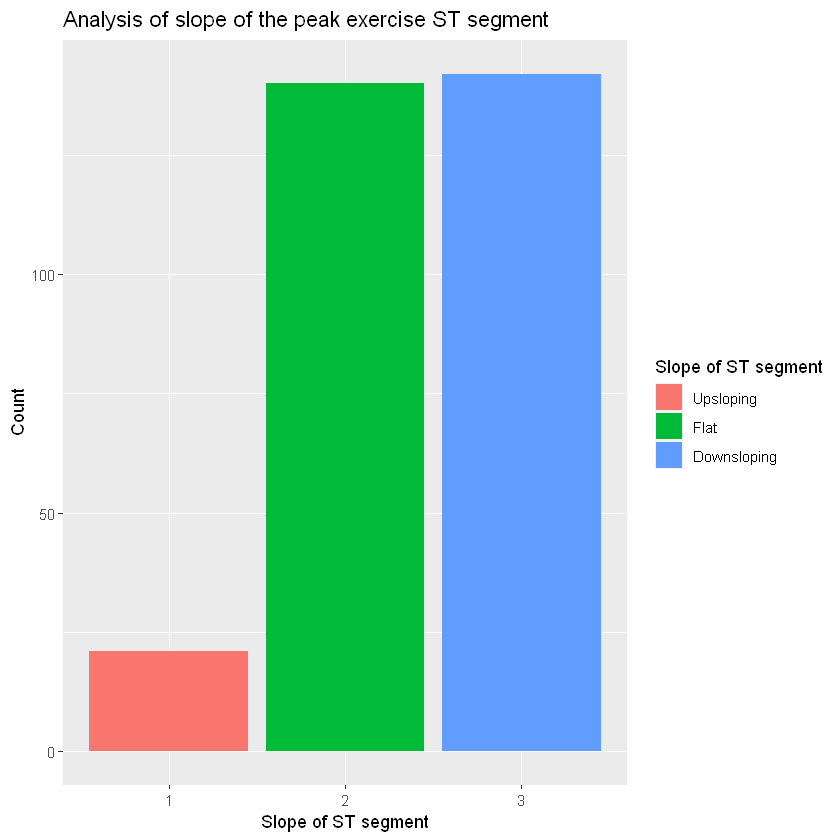

In [37]:
## Slope variable analysis

# Bar plot for slope (slope of the peak exercise ST segment) 
data$slope <- ifelse(data$slope == 0, 1, print(data$slope))
data$slope <- as.factor(data$slope)
ggplot(data, aes(x=data$slope, fill=data$slope)) + 
  geom_bar() +
  xlab("Slope of ST segment") +
  ylab("Count") +
  ggtitle("Analysis of slope of the peak exercise ST segment") +
  scale_fill_discrete(name = "Slope of ST segment", labels = c("Upsloping", "Flat", "Downsloping"))

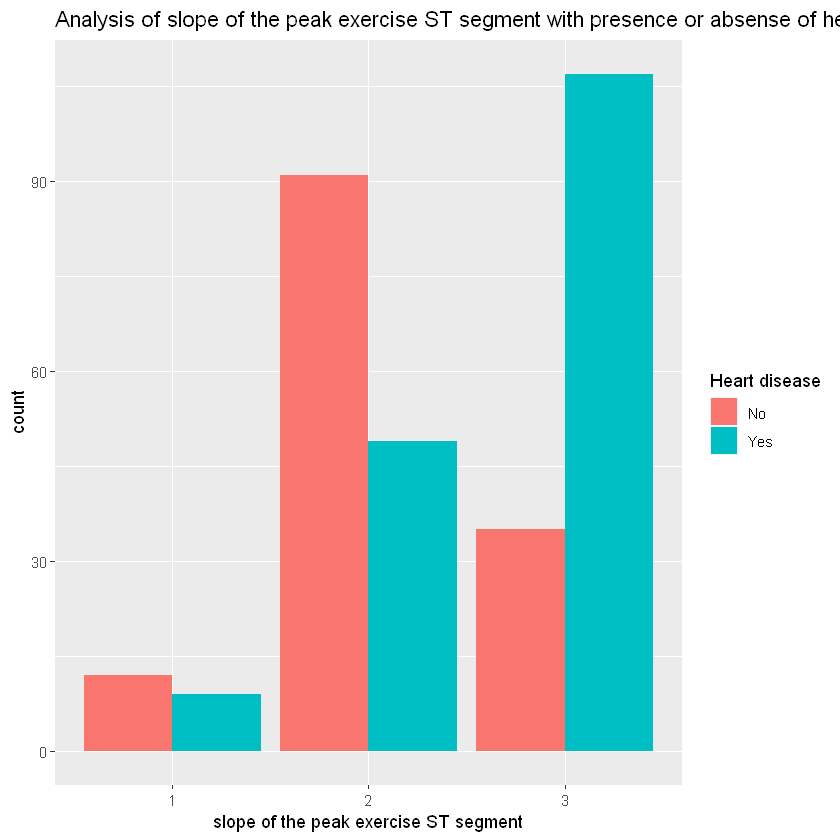

In [38]:
# Plot for slope ~ target
ggplot(data, aes(x= slope, fill=target)) + 
  geom_bar(position = 'dodge') +
  xlab("slope of the peak exercise ST segment") +
  ylab("count") +
  ggtitle("Analysis of slope of the peak exercise ST segment with presence or absense of heart disease") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


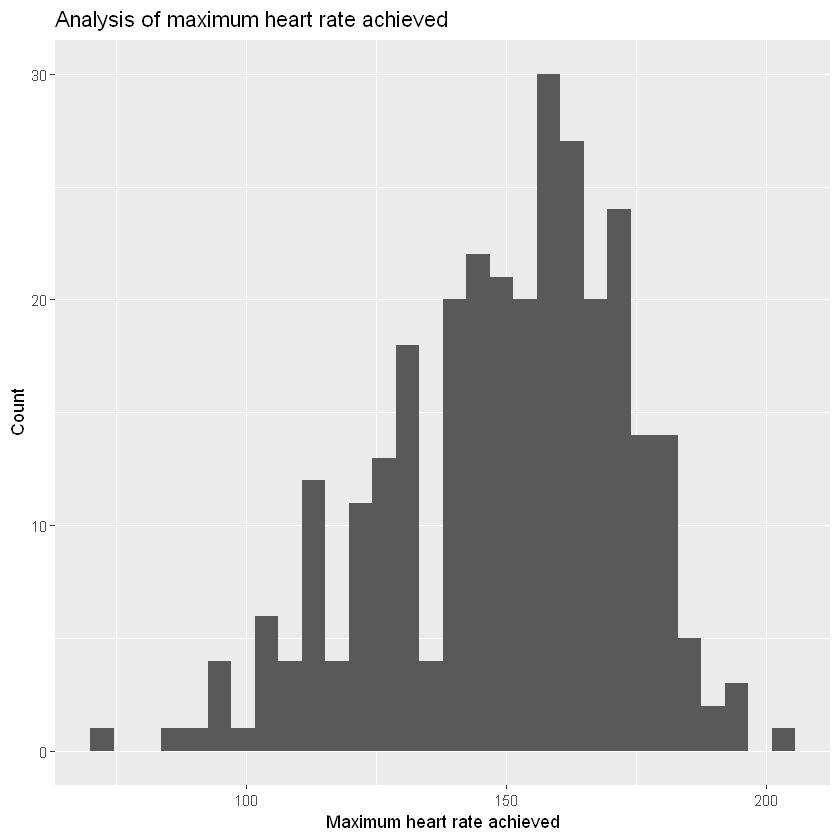

In [39]:
## thalach (maximum heart rate achieved) variable analysis


# Histogram for thalach (maximum heart rate achieved)
ggplot(data, aes(x=thalach)) + 
  geom_histogram() +
  xlab("Maximum heart rate achieved") +
  ylab("Count") +
  ggtitle("Analysis of maximum heart rate achieved")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


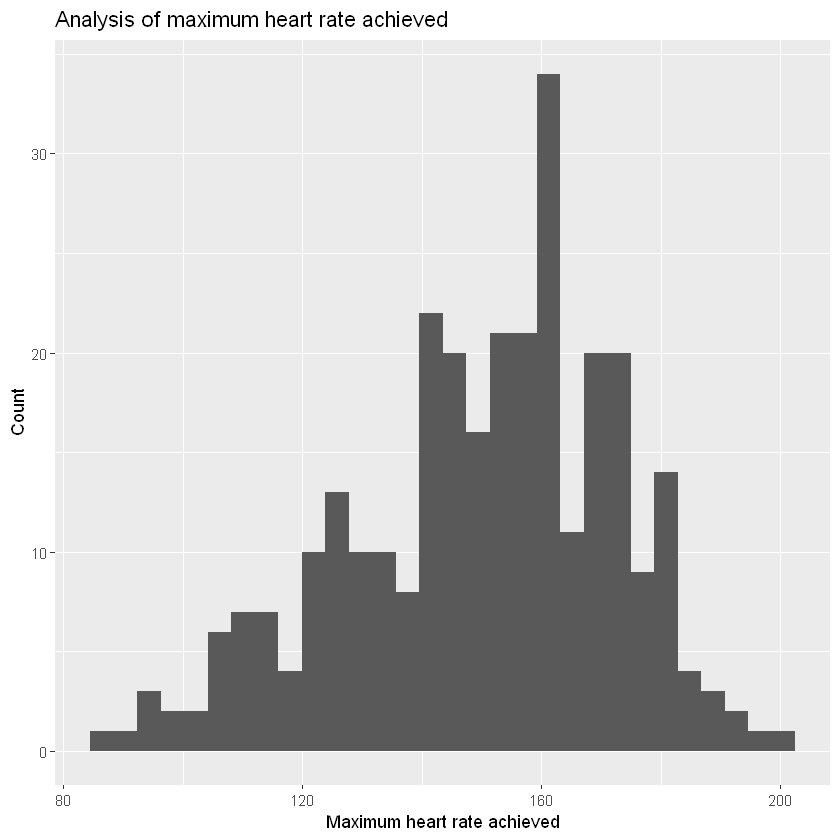

In [40]:
# Replacing the outlier value with median value of thalach
data$thalach = ifelse(data$thalach < 75, NA, data$thalach)
data$thalach = ifelse(is.na(data$thalach), median(data$thalach[which(!is.na(data$thalach))]), data$thalach)

ggplot(data, aes(x=thalach)) + 
  geom_histogram() +
  xlab("Maximum heart rate achieved") +
  ylab("Count") +
  ggtitle("Analysis of maximum heart rate achieved")

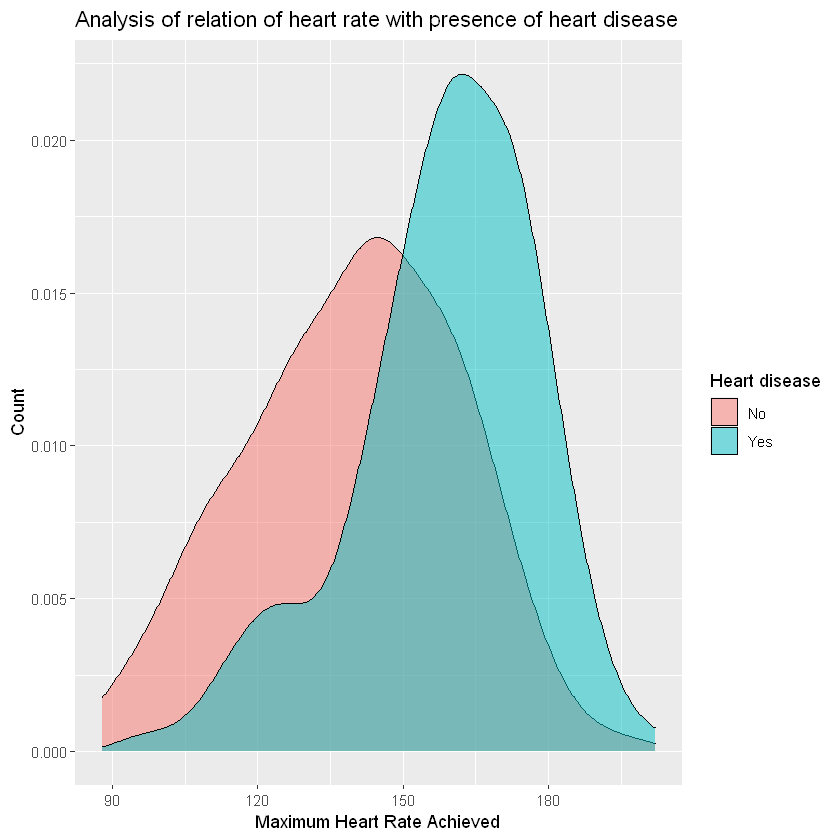

In [41]:

# Density plot for thalach ~ target
ggplot(data, aes(x = thalach, fill = target)) +
  geom_density(alpha=0.5) +
  xlab("Maximum Heart Rate Achieved") +
  ylab("Count") +
  ggtitle("Analysis of relation of heart rate with presence of heart disease") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))


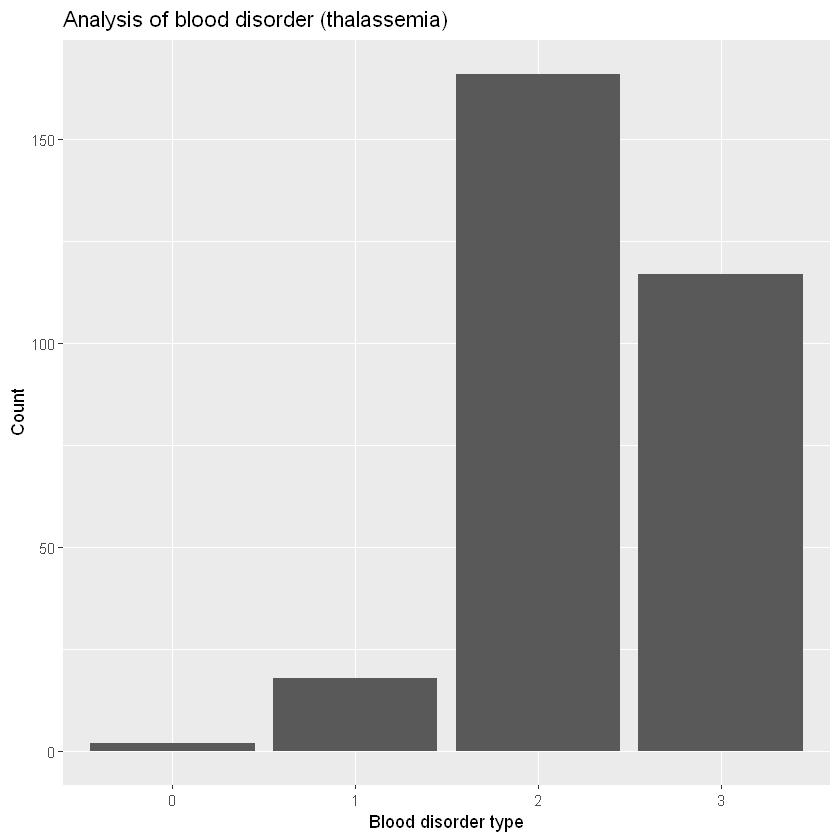

In [42]:

## thal (blood disorder called thalassemia) variable analysis


# Bar graph for thal (blood disorder called thalassemia)
ggplot(data, aes(x=thal)) + 
  geom_bar() +
  xlab("Blood disorder type") +
  ylab("Count") +
  ggtitle("Analysis of blood disorder (thalassemia)")

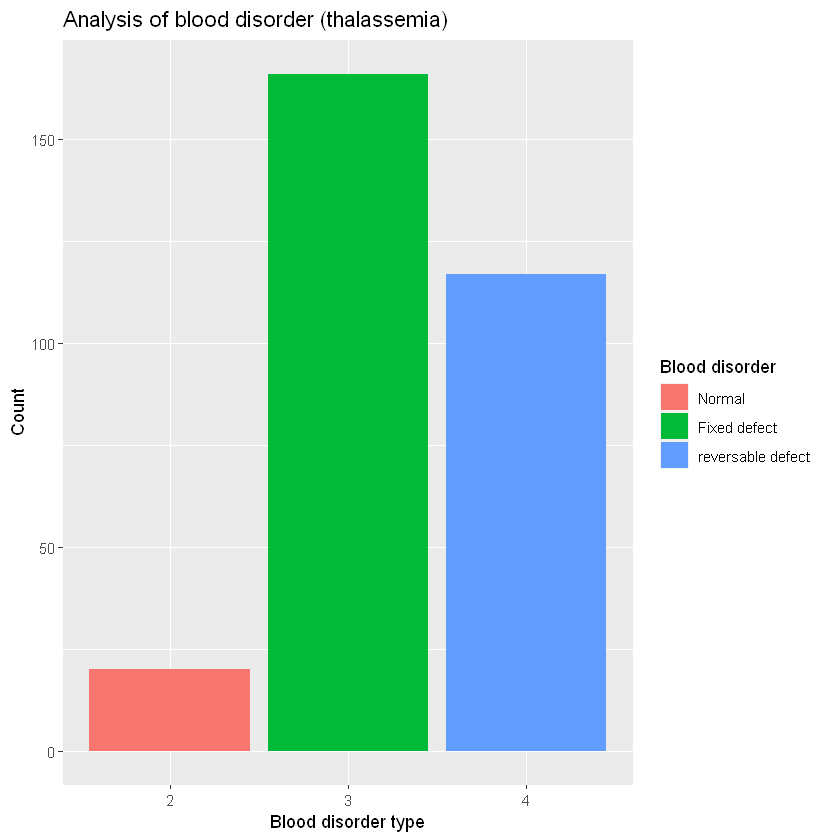

In [44]:
# Replacing the invalid value with mode value of thal
data$thal = ifelse(data$thal == 0, 2, data$thal)
data$thal <- as.factor(data$thal)

ggplot(data, aes(x=thal, fill=thal)) + 
  geom_bar() +
  xlab("Blood disorder type") +
  ylab("Count") +
  ggtitle("Analysis of blood disorder (thalassemia)") +
  scale_fill_discrete(name = "Blood disorder", labels = c("Normal", "Fixed defect", "reversable defect"))


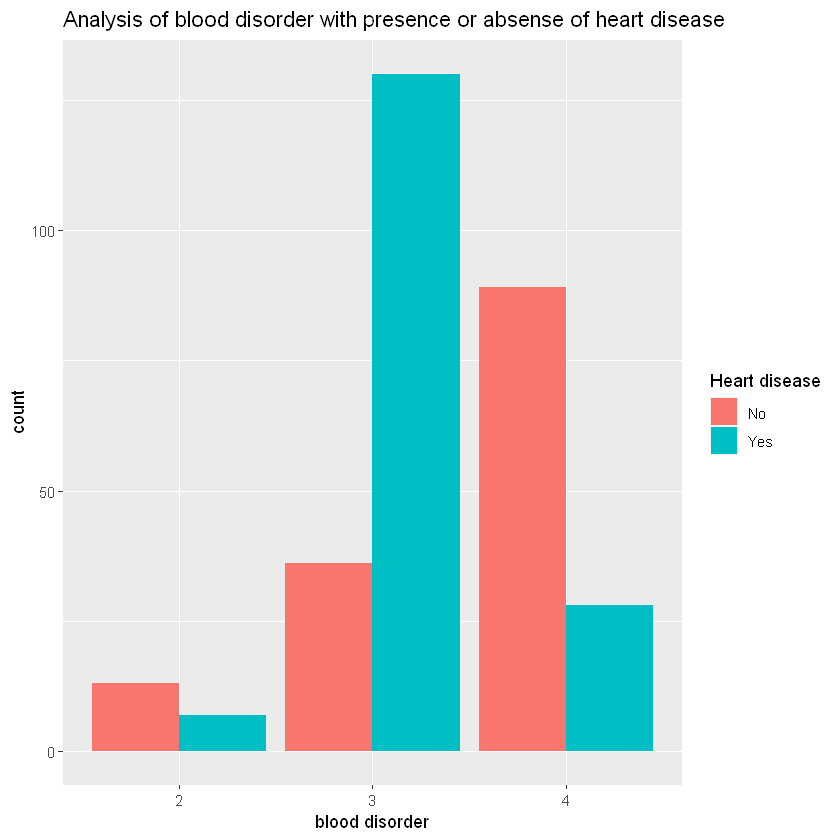

In [45]:
# Bar plot for thal ~ target
ggplot(data, aes(x= thal, fill=target)) + 
  geom_bar(position = 'dodge') +
  xlab("blood disorder") +
  ylab("count") +
  ggtitle("Analysis of blood disorder with presence or absense of heart disease") +
  scale_fill_discrete(name = "Heart disease", labels = c("No", "Yes"))


In [46]:

## Model implementation


In [47]:
# To get the same set every time we run the code
set.seed(123)


In [48]:
# Rearranging the columns to make the target as the last column
data <- data[, c(1, 2, 3, 4, 5, 6, 7, 9, 8)]

In [49]:
# Dividing the data set in train and test datasets
dataSample <- sample.split(data[,ncol(data)-1], SplitRatio=0.80)
trainSet = subset(data,dataSample == TRUE)
testSet = subset(data,dataSample == FALSE)


In [50]:
# Creating a logistic model
logisticmodel <- glm(target~.,data = trainSet, family = "binomial")

In [51]:
# Summary of the created model
summary(logisticmodel)



Call:
glm(formula = target ~ ., family = "binomial", data = trainSet)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6957  -0.3325   0.1125   0.4204   3.2547  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.01638    2.35453   0.007 0.994450    
cp1          0.89900    0.61288   1.467 0.142416    
cp2          1.85782    0.57492   3.231 0.001232 ** 
cp3          2.08433    0.76776   2.715 0.006631 ** 
thalach      0.01864    0.01360   1.371 0.170413    
exang1      -0.41637    0.51755  -0.804 0.421108    
oldpeak     -0.38615    0.56029  -0.689 0.490694    
slope2      -0.90073    0.87012  -1.035 0.300585    
slope3       0.86423    0.94868   0.911 0.362303    
ca1         -2.03581    0.54756  -3.718 0.000201 ***
ca2         -3.67756    0.87783  -4.189  2.8e-05 ***
ca3         -2.65376    1.03739  -2.558 0.010524 *  
ca4         -0.06058    2.75935  -0.022 0.982485    
thal3       -0.42380    0.90950  -0.466 0.641236    
thal4

In [52]:
# Making prediction with the above model
predictdata <- predict(logisticmodel, newdata = testSet[, -9], type="response")
pred <- ifelse(predictdata>=0.5,1,0)
pred <- as.factor(pred)
observed <- testSet[,9]

In [53]:

# Checking the accuracy of the model
confusionMatrix(pred, observed)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 22  9
         1  3 26
                                          
               Accuracy : 0.8             
                 95% CI : (0.6767, 0.8922)
    No Information Rate : 0.5833          
    P-Value [Acc > NIR] : 0.0003307       
                                          
                  Kappa : 0.6022          
                                          
 Mcnemar's Test P-Value : 0.1489147       
                                          
            Sensitivity : 0.8800          
            Specificity : 0.7429          
         Pos Pred Value : 0.7097          
         Neg Pred Value : 0.8966          
             Prevalence : 0.4167          
         Detection Rate : 0.3667          
   Detection Prevalence : 0.5167          
      Balanced Accuracy : 0.8114          
                                          
       'Positive' Class : 0               
                                    